**Machine Learning: Regression - Predicting Energy Efficiency of Buildings**

**READING THE DATA**

In [1]:
import pandas as pd

In [2]:
from google.colab import drive 
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv", parse_dates=["date"])

In [4]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**DATA STRUCTURE**

In [6]:
df.columns = [x.lower() for x in df.columns]

In [7]:
df = df.set_index("date")

In [8]:
df.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
df.shape

(19735, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   t1           19735 non-null  float64
 3   rh_1         19735 non-null  float64
 4   t2           19735 non-null  float64
 5   rh_2         19735 non-null  float64
 6   t3           19735 non-null  float64
 7   rh_3         19735 non-null  float64
 8   t4           19735 non-null  float64
 9   rh_4         19735 non-null  float64
 10  t5           19735 non-null  float64
 11  rh_5         19735 non-null  float64
 12  t6           19735 non-null  float64
 13  rh_6         19735 non-null  float64
 14  t7           19735 non-null  float64
 15  rh_7         19735 non-null  float64
 16  t8           19735 non-null  float64
 17  rh_8         19735 non-null  float64
 18  t9         

In [11]:
df.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [12]:
df.isnull().sum()

appliances     0
lights         0
t1             0
rh_1           0
t2             0
rh_2           0
t3             0
rh_3           0
t4             0
rh_4           0
t5             0
rh_5           0
t6             0
rh_6           0
t7             0
rh_7           0
t8             0
rh_8           0
t9             0
rh_9           0
t_out          0
press_mm_hg    0
rh_out         0
windspeed      0
visibility     0
tdewpoint      0
rv1            0
rv2            0
dtype: int64

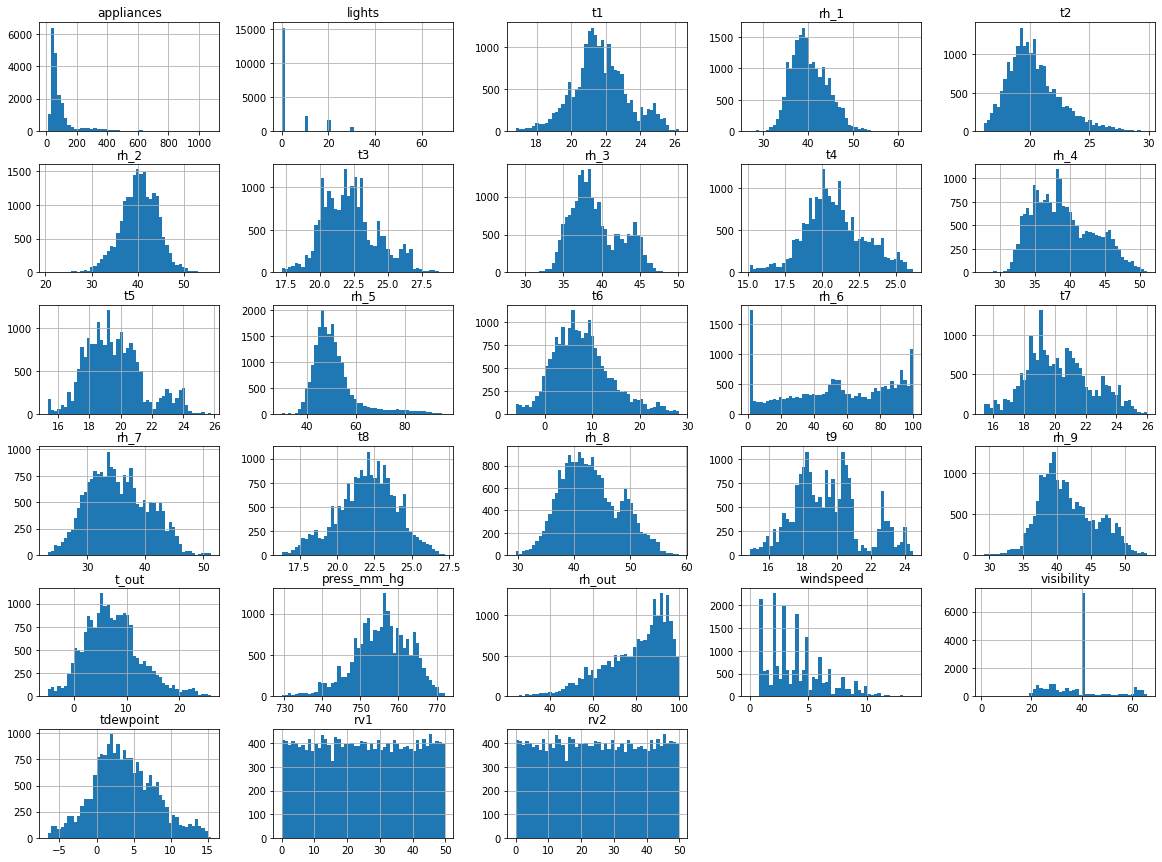

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [14]:
df.corr()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
t1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
rh_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
t2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
rh_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
t3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
rh_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
t4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
rh_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [15]:
import seaborn as sns

In [16]:
#sns.pairplot(df)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

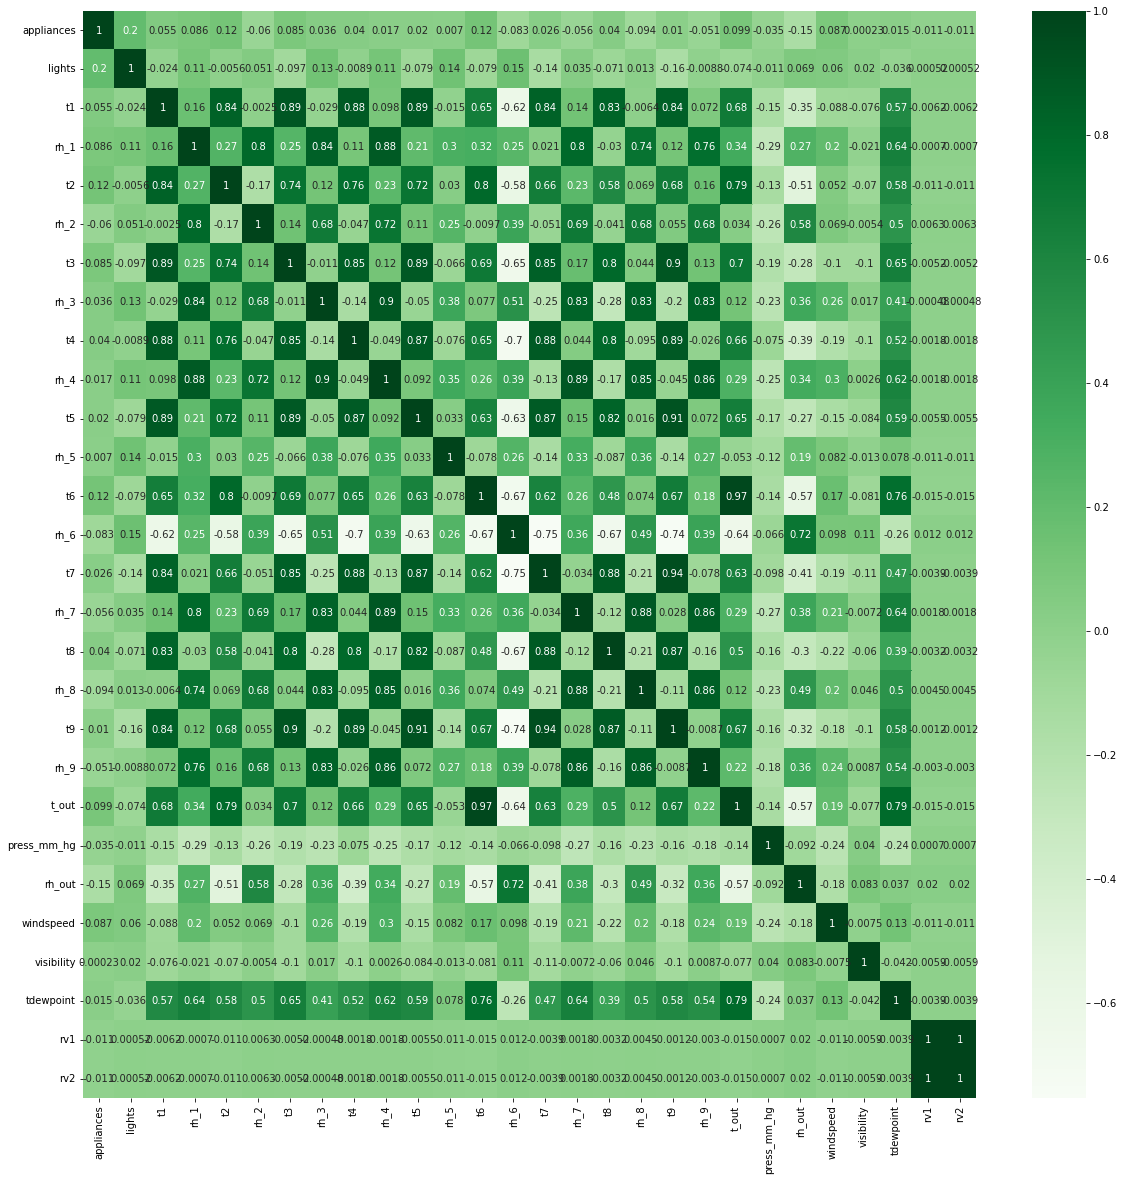

In [18]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='Greens')

In [19]:
sorted_appliances = df.sort_values("appliances", ascending = False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,18.890000,51.881667,0.466667,96.090000,19.790,37.184286,20.926667,42.663333,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,17.856667,37.608333,-1.600000,90.933333,17.290,28.225000,19.356667,37.429444,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,17.100000,53.000000,4.966667,74.166667,17.600,38.530000,18.200000,45.590000,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,20.890000,45.833333,16.830000,12.730000,21.790,36.466667,24.666667,42.526667,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,17.867778,37.728333,-1.730000,91.230000,17.235,28.153889,19.390000,37.228889,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


In [20]:
len(sorted_appliances.head(len(sorted_appliances)//1000))

19

In [21]:
sorted_appliances.appliances[19]

790

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 790 wh.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


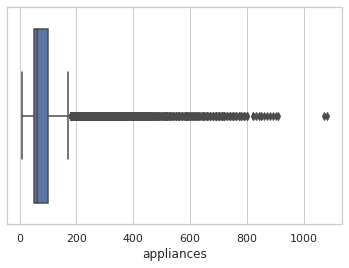

In [22]:
sorted_appliances - df.sort_values('appliances', ascending=False) 
print("The number of the 0,1% top values of appliances' load is", 
      len(sorted_appliances.head(len(sorted_appliances)//1000)), "and they have power load higher than", 
      sorted_appliances.appliances[19], "wh.") 
#boxplot appliances  
sns.set(style="whitegrid") 
ax = sns.boxplot(sorted_appliances.appliances)

In [23]:
df = df.dropna()
df = df.drop(df[(df.appliances>790)|(df.appliances<0)].index)

In [24]:
sorted_appliances = df.sort_values("appliances", ascending = False)
sorted_appliances.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-17 17:40:00,790,10,21.566667,38.626667,20.10,37.040909,20.790000,37.260000,21.066667,36.966667,18.0,46.117500,-1.033333,95.260000,21.365,31.247500,22.500000,39.450000,18.10,37.290000,-0.266667,764.833333,79.666667,2.000000,40.000000,-3.466667,36.170216,36.170216
2016-05-21 09:40:00,790,0,23.000000,50.260000,25.53,43.133333,24.390000,44.490000,23.600000,47.260000,22.5,50.431667,22.200000,7.493333,22.890,43.900000,23.290000,51.090000,23.00,47.462500,16.900000,756.333333,79.666667,4.666667,28.333333,13.333333,44.856357,44.856357
2016-01-14 18:50:00,790,10,22.166667,40.500000,21.70,38.626667,22.166667,42.133333,18.790000,44.626667,17.1,53.900000,4.297500,71.745000,17.700,38.430000,18.823333,45.400000,16.89,42.326667,4.083333,748.433333,76.833333,6.833333,40.000000,0.350000,30.487447,30.487447
2016-04-04 12:20:00,790,0,22.390000,45.563333,22.39,42.966667,25.000000,41.433333,21.600000,43.590000,20.7,49.363333,16.000000,16.763333,21.290,37.863333,23.700000,44.863333,20.60,44.433333,13.466667,749.866667,68.666667,7.000000,40.000000,7.766667,4.089491,4.089491
2016-04-29 11:40:00,780,0,20.133333,37.333333,18.26,39.590000,21.890000,34.260000,19.500000,35.663333,18.6,40.400000,10.630000,35.426667,19.000,32.326667,20.500000,38.090000,18.60,36.466667,7.233333,755.233333,89.000000,4.333333,26.000000,5.500000,44.465602,44.465602


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
df["hour"] = df.index.hour
df["week"] = df.index.week
df["weekday"] = df.index.weekday
df["month"] = df.index.month

In [27]:
import numpy as np
df["log_appliances"] = np.log(df.appliances)

In [28]:
df['house_temp'] = (df.t1+df.t2+df.t3+df.t4+df.t5+df.t6+df.t7+df.t8+df.t9)/8
df['house_hum'] = (df.rh_1+df.rh_2+df.rh_3+df.rh_4+df.rh_5+df.rh_6+df.rh_7+df.rh_8+df.rh_9)/8

In [29]:
df['house_temp'].head()

date
2016-01-11 17:00:00    19.313333
2016-01-11 17:10:00    19.293333
2016-01-11 17:20:00    19.241667
2016-01-11 17:30:00    19.200417
2016-01-11 17:40:00    19.204583
Name: house_temp, dtype: float64

In [30]:
df['house_hum'].head()

date
2016-01-11 17:00:00    57.274583
2016-01-11 17:10:00    57.180625
2016-01-11 17:20:00    56.957500
2016-01-11 17:30:00    56.896667
2016-01-11 17:40:00    57.074583
Name: house_hum, dtype: float64

In [31]:
#Remove Additive assumptions 
df['hour*lights'] = df.hour * df.lights 
df['t3rh3'] = df.t3 * df.rh_3 
df['t2rh2'] = df.t2 * df.rh_2 
df['t1rh1'] = df.t1 * df.rh_1
df['t4rh4'] = df.t4 * df.rh_4 
df['t5rh5'] = df.t5 * df.rh_5 
df['t6rh6'] = df.t6 * df.rh_6  
df['t7rh7'] = df.t7 * df.rh_7 
df['t8rh8'] = df.t8 * df.rh_8 
df['t9rh9'] = df.t9 * df.rh_9 

In [32]:
def code_mean(data, cat_feature , real_feature): 
  return dict(data.groupby(cat_feature)[real_feature].mean())  

In [33]:
df['weekday_avg'] = list(map( 
    code_mean(df[:], "weekday", "appliances").get, df.weekday)) 
df['hour_avg'] = list(map( 
    code_mean(df[:], 'hour', "appliances").get, df.hour))

In [34]:
df['weekday_avg'].head()

date
2016-01-11 17:00:00    110.896974
2016-01-11 17:10:00    110.896974
2016-01-11 17:20:00    110.896974
2016-01-11 17:30:00    110.896974
2016-01-11 17:40:00    110.896974
Name: weekday_avg, dtype: float64

In [35]:
df['hour_avg'].head()

date
2016-01-11 17:00:00    158.812121
2016-01-11 17:10:00    158.812121
2016-01-11 17:20:00    158.812121
2016-01-11 17:30:00    158.812121
2016-01-11 17:40:00    158.812121
Name: hour_avg, dtype: float64

In [36]:
df_hour = df.resample("1H").mean()
df_30min = df.resample("30min").mean()

In [37]:
df_hour.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,hour,week,weekday,month,log_appliances,house_temp,house_hum,hour*lights,t3rh3,t2rh2,t1rh1,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,6.586667,84.260000,17.177778,41.400000,18.150000,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,26.823044,26.823044,17.0,2.0,0.0,1.0,4.003184,19.238819,57.087465,595.0,888.527022,856.829333,924.940250,865.964011,946.169778,554.915281,711.162778,884.102611,773.352500,110.896974,158.812121
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,6.180000,87.204444,17.229583,42.046806,18.094444,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,22.324206,22.324206,18.0,2.0,0.0,1.0,4.722106,19.180226,57.420521,930.0,886.948467,856.285333,912.911138,871.050550,940.731111,538.900833,724.603275,879.339537,769.099683,110.896974,187.426829
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,5.857361,88.131389,17.850000,45.017778,18.156111,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,33.734932,33.734932,19.0,2.0,0.0,1.0,4.923982,19.418073,59.681736,475.0,947.194409,918.042333,1082.595585,907.027646,957.418201,516.283758,803.639470,893.576233,765.862903,110.896974,141.256098
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,5.469444,86.933889,17.632222,42.920000,18.773333,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,25.679642,25.679642,20.0,2.0,0.0,1.0,4.793191,19.624687,61.222361,700.0,955.471915,924.086998,1015.527493,944.715828,1305.601119,475.450769,756.810111,942.331767,762.058033,110.896974,126.982968
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,5.578889,86.129444,17.863611,43.618333,19.153333,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,18.826274,18.826274,21.0,2.0,0.0,1.0,4.636940,19.951424,59.743542,490.0,940.519133,925.660526,975.375491,930.867622,1269.097126,480.490483,779.185664,948.882974,756.803367,110.896974,96.496350


In [38]:
df_30min.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,t5,rh_5,t6,rh_6,t7,rh_7,t8,rh_8,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,hour,week,weekday,month,log_appliances,house_temp,house_hum,hour*lights,t3rh3,t2rh2,t1rh1,t4rh4,t5rh5,t6rh6,t7rh7,t8rh8,t9rh9,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,17.166667,55.163333,6.806667,83.825556,17.200000,41.540000,18.200000,48.831111,17.033333,45.530000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,20.174765,20.174765,17.0,2.0,0.0,1.0,4.033571,19.282778,57.137569,510.000000,886.943822,858.490667,932.111700,869.389633,946.970556,570.661341,714.488000,888.726222,775.528333,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,17.166667,55.070000,6.366667,84.694444,17.155556,41.260000,18.100000,48.590000,17.000000,45.363333,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,33.471323,33.471323,17.0,2.0,0.0,1.0,3.972797,19.194861,57.037361,680.000000,890.110222,855.168000,917.768800,862.538389,945.369000,539.169222,707.837556,879.479000,771.176667,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,17.122222,54.955556,6.192222,86.580000,17.133333,41.266667,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,37.243118,37.243118,18.0,2.0,0.0,1.0,4.094345,19.154167,57.184896,840.000000,886.051567,853.973333,905.781086,865.434856,940.962222,536.096252,707.037778,879.479000,769.930000,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,17.100000,55.000000,6.167778,87.828889,17.325833,42.826944,18.088889,48.604444,16.963333,45.290000,5.966667,734.366667,91.333333,5.666667,40.000000,4.633333,7.405293,7.405293,18.0,2.0,0.0,1.0,5.349868,19.206285,57.656146,1020.000000,887.845367,858.597333,920.041189,876.666244,940.500000,541.705415,742.168772,879.200074,768.269367,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,17.100000,55.251111,6.030278,88.320556,17.916667,45.728889,18.066667,48.806667,16.914444,45.320556,6.000000,734.616667,90.500000,6.000000,40.000000,4.516667,30.682800,30.682800,19.0,2.0,0.0,1.0,5.396805,19.369618,59.268333,633.333333,916.680319,889.560074,1058.785585,901.127778,944.794000,532.611649,819.320252,881.779630,766.571272,110.896974,141.256098


In [39]:
# setting the assumptions as to lower or higher
#Tryouts 

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1  
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1 

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1 
df_30min['high_consum'] = (df_30min.appliances+35>(df_30min.hour_avg))*1 

In [40]:
def daily(x,df=df): 
  return df.groupby('weekday')[x].mean() 
def hourly(x, df=df): 
  return df.groupby('hour')[x].mean() 

def monthly_daily(x, df=df): 
  by_day = df.pivot_table(index='weekday' , 
                          columns=['month'], 
                          values=x, 
                          aggfunc='mean') 
  return round(by_day, ndigits=2)

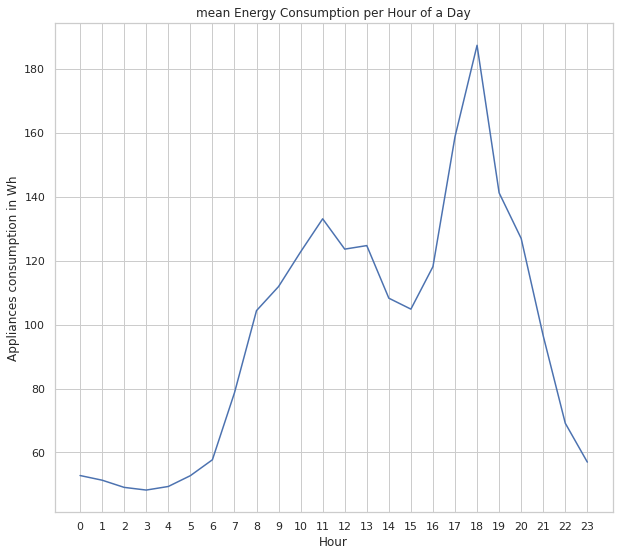

In [41]:
#plotting the hourly consumption  
hourly('appliances').plot(figsize=(10,9)) 
plt.xlabel('Hour')  
plt.ylabel('Appliances consumption in Wh') 
ticks = list(range(0, 24, 1))  
plt.title('mean Energy Consumption per Hour of a Day') 
plt.xticks(ticks);

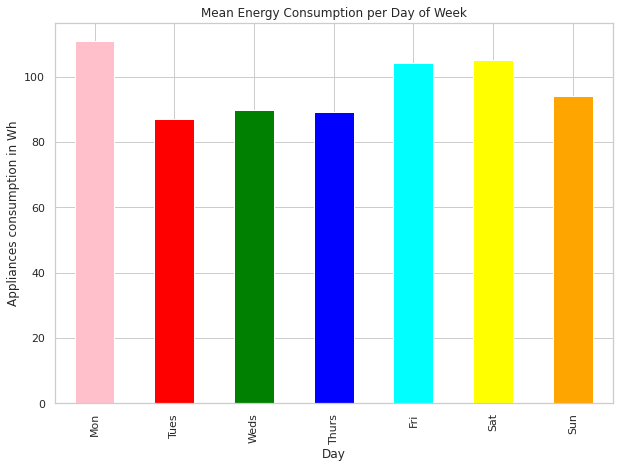

In [42]:
#weekly consumption 
daily('appliances').plot(kind = 'bar', color = ['pink', 'red', 'green', 'blue','cyan', 'yellow', 'orange'], figsize =(10,7)) 
ticks = list(range(0, 7, 1))  
labels = "Mon Tues Weds Thurs Fri Sat Sun".split() 
plt.xlabel('Day')  
plt.ylabel('Appliances consumption in Wh') 
plt.title('Mean Energy Consumption per Day of Week') 
plt.xticks(ticks, labels);

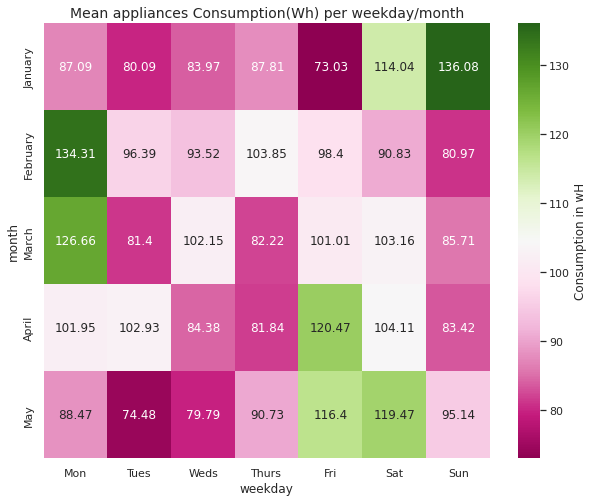

In [43]:
#Monthly consumption
sns.set(rc={'figure.figsize':(10,8)},) 
ax=sns.heatmap(monthly_daily('appliances').T, cmap="PiYG", 
               xticklabels="Mon Tues Weds Thurs Fri Sat Sun".split(), 
               yticklabels="January February March April May".split(), 
               annot=True, fmt= 'g', 
               cbar_kws={'label': 'Consumption in wH'}).set_title("Mean appliances Consumption(Wh) per weekday/month").set_fontsize("14")
plt.show()

Text(0.5, 0, 'Appliances Log(wH)')

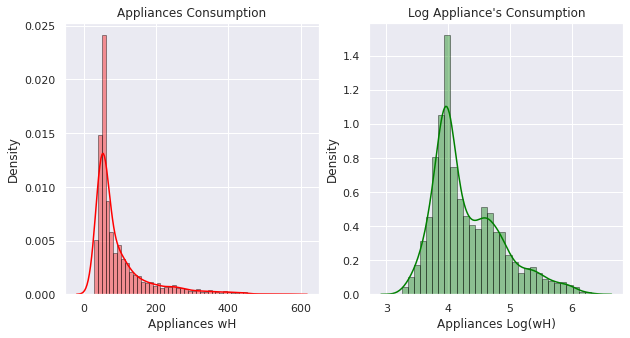

In [44]:
f, axes = plt.subplots(1, 2,figsize=(10,5)) 

sns.distplot(df_hour.appliances, hist=True, color = 'red', hist_kws = {'edgecolor': 'black'}, ax=axes[0])  
axes[0].set_title("Appliances Consumption") 
axes[0].set_xlabel("Appliances wH") 

sns.distplot(df_hour.log_appliances, hist=True, color = 'green', hist_kws={'edgecolor': 'black'}, ax=axes[1]) 
axes[1].set_title("Log Appliance's Consumption") 
axes[1].set_xlabel("Appliances Log(wH)")

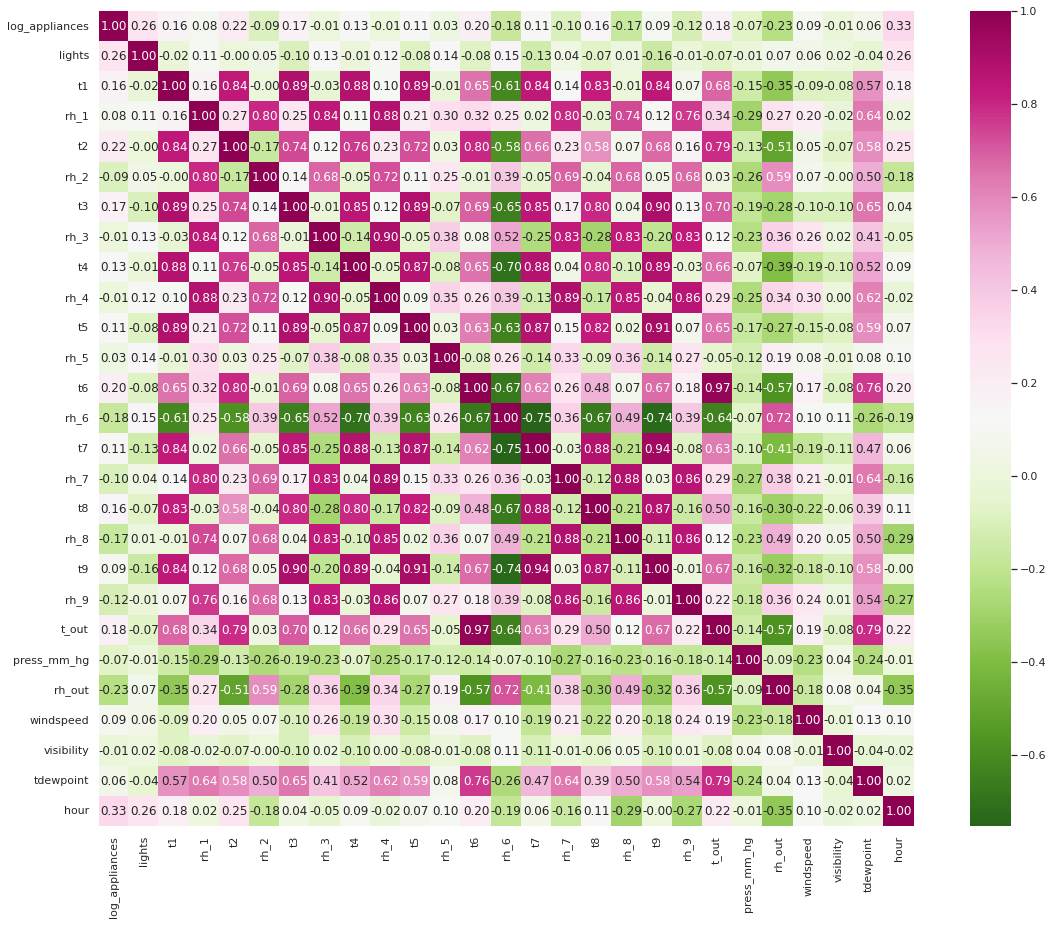

In [45]:
col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4', 
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9', 
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility', 
       'tdewpoint', 'hour'] 
corr = df[col].corr() 
plt.figure(figsize=(20,15)) 
sns.set(font_scale=1) 
sns.heatmap(corr, cbar=True , annot=True, square = True, cmap='PiYG_r', fmt = '.2f', xticklabels=col, yticklabels=col) 
plt.show();

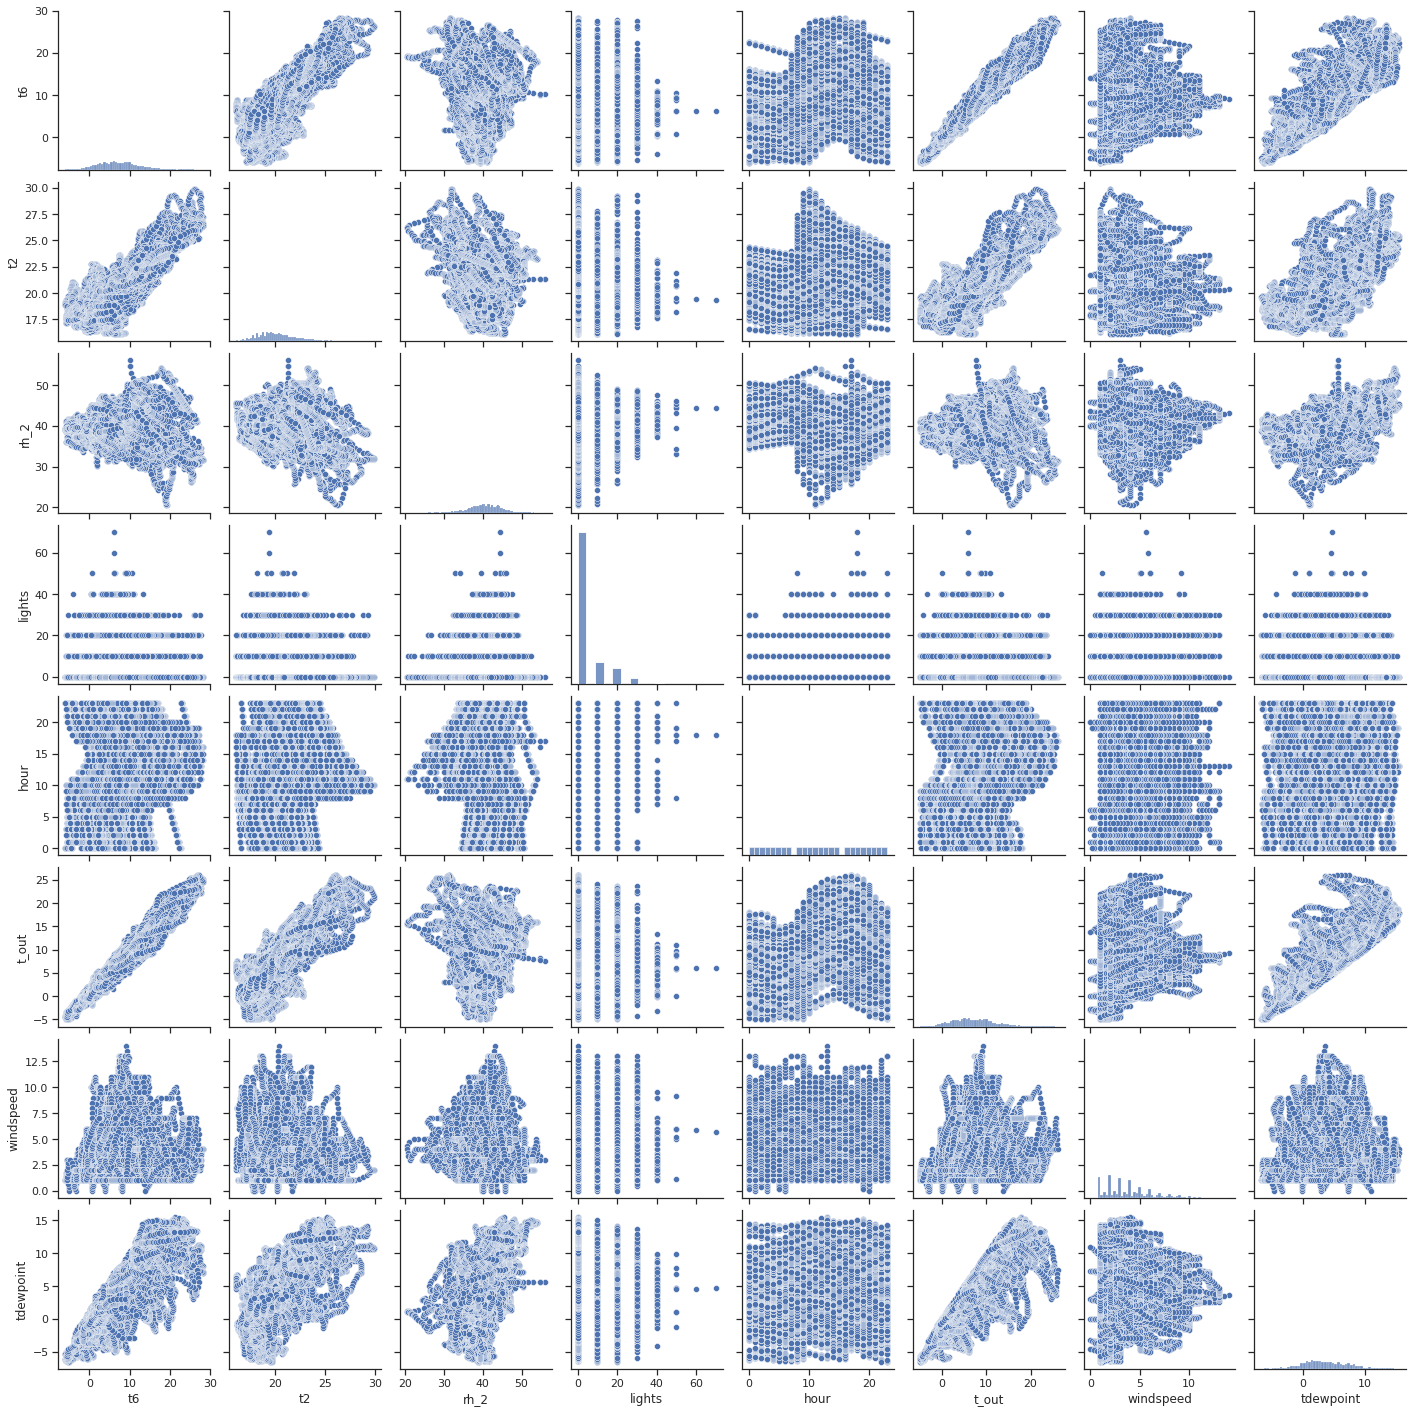

In [46]:
col = ['t6', 't2', 'rh_2','lights', 'hour','t_out', 'windspeed','tdewpoint'] 
sns.set(style="ticks", color_codes=True) 
sns.pairplot(df[col])
plt.show();

**Training the Model**

In [47]:
for cat_feature in ['weekday', 'hour']: 
  df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1) 
  df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1) 
  df = pd.concat([df, pd.get_dummies(df[cat_feature])], axis=1)

In [48]:
lin_model = ['low_consum','high_consum', 'hour', 't6', 'rh_6', 'lights','hour*lights', 'windspeed', 't6rh6'] 

In [49]:
df_hour.lights = df_hour.lights.astype(float) 
df_hour.log_appliances = df_hour.log_appliances.astype(float) 
df_hour.hour = df_hour.hour.astype(float) 
df_hour.low_consum = df_hour.low_consum.astype(float) 
df_hour.high_consum = df_hour.high_consum.astype(float) 
df_hour.t6rh6 = df_hour.t6rh6.astype(float)

In [50]:
test_size=.2 
test_index = int(len(df_hour.dropna())*(1-test_size)) 

X1_train, X1_test = df_hour[lin_model].iloc[:test_index,], df_hour[lin_model].iloc[test_index: ,] 
y1_train = df_hour.log_appliances.iloc[:test_index,] 
y_test = df_hour.log_appliances.iloc[test_index:,] 

In [51]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X1_train) 
X1_train = scaler.transform(X1_train) 
X1_test = scaler.transform(X1_test) 

In [52]:
from sklearn import linear_model 
lin_model = linear_model.LinearRegression() 
lin_model.fit(X1_train, y1_train) 

LinearRegression()

**Model Evaluation and Selection**

In [53]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn import metrics

In [54]:
def evaluate(model , test_features, test_labels): 
  predictions  = model.predict(test_features) 
  errors = abs(predictions  -  test_labels)
  mape = 100*np.mean(errors / test_labels)
  r_score = 100*r2_score(test_labels,predictions) 
  accuracy = 100 - mape 
  print(model, '\n') 
  print('Average Error : {:0.4f} degrees'.format(np.mean(errors)))
  print('Variance score R^2  : {:0.2f}%' .format(r_score))
  print('Accuracy  : {:0.2f}%\n' .format(accuracy))

In [55]:
evaluate(lin_model, X1_test, y_test) 

LinearRegression() 

Average Error : 0.3494 degrees
Variance score R^2  : 14.00%
Accuracy  : 91.87%



In [56]:
cv = TimeSeriesSplit(n_splits = 10) 
print('Linear Model: ') 
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv, scoring='neg_mean_absolute_error') 
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2)) 
scores = cross_val_score(lin_model, X1_train, y1_train, cv=cv, scoring='r2') 
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean (), scores.std() * 2) )

Linear Model: 
Accuracy: 99.64 (+/- 0.06) degrees
R^2: 0.26 (+/- 0.22) degrees


In [57]:
y1_pred = lin_model.predict(X1_test)

Text(0.5, 0.01, 'Fitted Values')

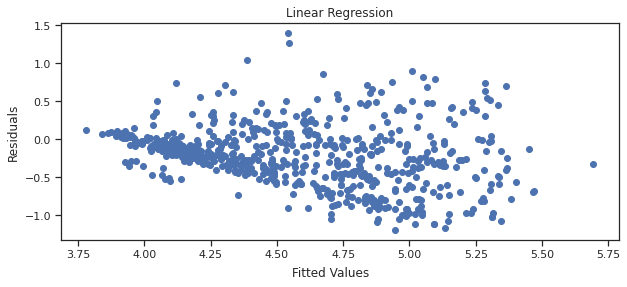

In [58]:
fig, ax = plt.subplots(figsize=(10,4), sharey=True) 
ax.scatter(y1_pred,y_test-y1_pred) 
ax.set_title('Linear Regression') 
fig.text(0.06, 0.5,'Residuals', ha='center', va='center', rotation='vertical') 
fig.text(0.5, 0.01, 'Fitted Values', ha='center' , va="center")

Text(0.5, 0.01, 'True Values')

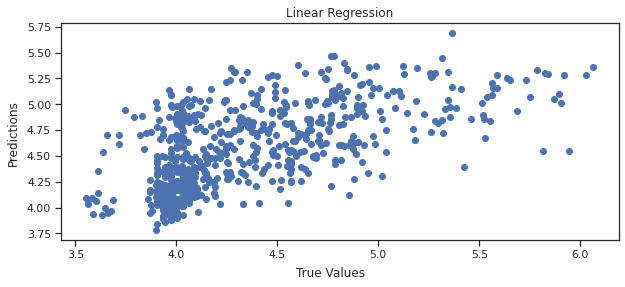

In [59]:
fig, ax =  plt.subplots(figsize=(10,4), sharey=True) 
ax.scatter(y_test,y1_pred) 
ax.set_title('Linear Regression') 
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical') 
fig.text(0.5, 0.01, 'True Values', ha='center', va='center')

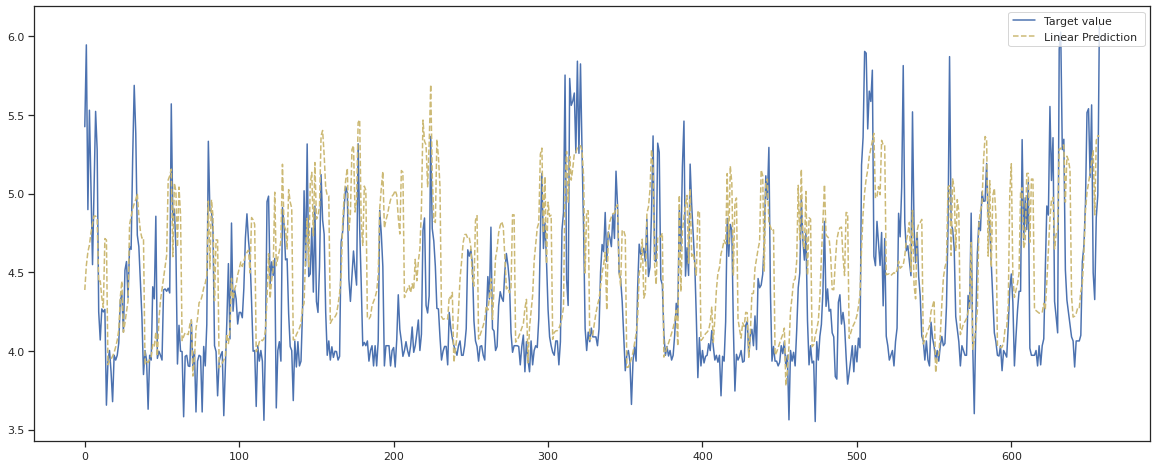

In [60]:
fig = plt.figure(figsize=(20,8)) 
plt.plot(y_test.values, label='Target value', color='b') 
plt.plot(y1_pred,label='Linear Prediction ', linestyle='--', color='y') 
plt.legend(loc=1)